In [2]:
rlist

['results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_all',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_211_2124',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_211_1528',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107_1750',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_212',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_211_1922',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107_1840',
 'results_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107_1847']

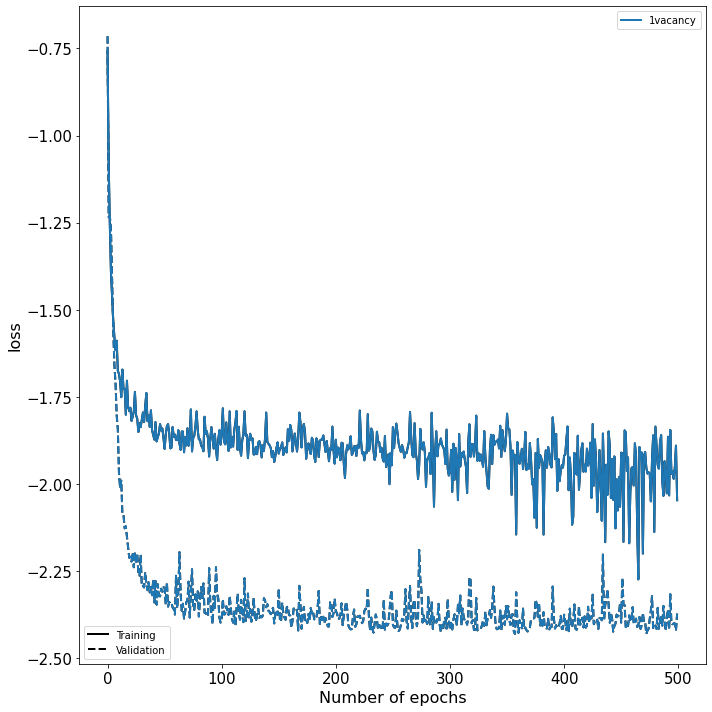

In [1]:
from evaluate import *
import os

parent_dir   = "/u/skhan/stem-learning/"
rlist = [x for x in os.listdir(parent_dir + "results/exp/") if "old" not in x]
identifier = rlist[4]

results_dir  = parent_dir + "results/exp/{}/".format(identifier)

label_list = ["1vacancy"] 
results_dir_list = ["{}{}/".format(results_dir, label) for label in label_list]

diagnostics_data = get_diagnostic_data(results_dir_list, False)


%matplotlib inline
plot_diagnostics(diagnostics_data, label_list, diag="loss", log=True, invert=False, N=1)
#log(1 - TP/(TP + FN))

In [11]:
def evaluate_image(data_dir):
    lbl = "1vacancy"
    model_dir = results_dir + lbl + "/"

    model_fn = model_dir + "model.json"                                              
    model_weights_fn = model_dir + "weights.h5"
    input_file = data_dir + "input.tif"
    l_shape = (256, 256)
    stride  = (64,64)
    avg = True
    plot=True
    save_data=False
    save_dir = "./"                                                         
    fname = "generated_1_vacancy_label.tiff"

    %matplotlib inline
    prediction = evaluate(model_fn, model_weights_fn, input_file, l_shape, stride,
                        avg=avg, plot=plot, save_data=save_data, save_dir=save_dir, fname=fname)

    label_file_list = [data_dir + "label_{}.tif".format(lbl)]
    #label_file_list = ["./labels/1847_img_manual_label_vacancies.tif"]
    tol=.5
    nconvs = 2
    r = 9
    TN = 0
    plot=True
    save_data=False
    save_dir = "./"                                                         
    prefix = "generated_{}_".format(lbl)
    verbose = True

    %matplotlib inline
    TP, FP, FN, TN, recall, precision, F1, bal_acc = calc_accuracy(prediction, label_file_list, tol=tol, bdy=32,
                                                                nconvs=nconvs, r=r, TN=TN, plot=plot, 
                                                                save_data=save_data, save_dir=save_dir, 
                                                                prefix=prefix, verbose=verbose)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


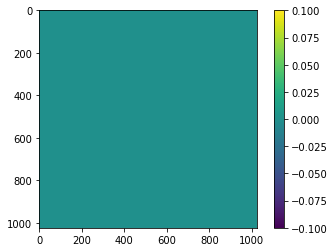

/u/skhan/stem-learning/code/3_evaluate/../2_trainer/accuracy.py:7: RuntimeWarning: invalid value encountered in true_divide
  conv_label_img = (label_img - np.min(label_img))/np.ptp(label_img)


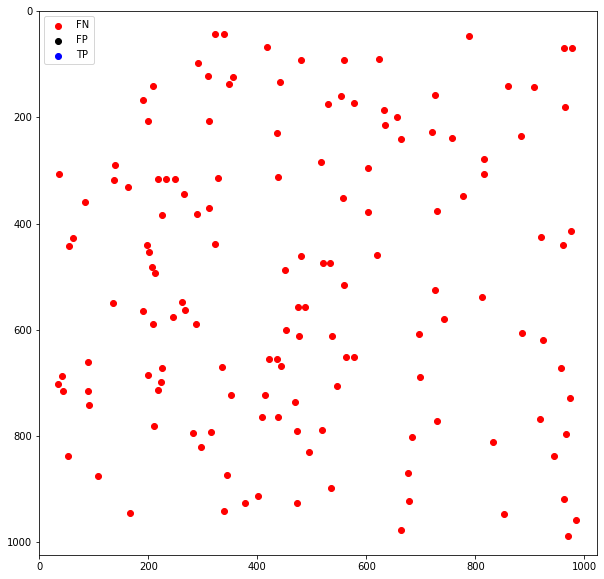

TP: 0
FP: 0
FN: 143
TN: 0

recall:    0.0
precision: -1
F1:        -1
bal_acc:   -1


In [12]:
data_dir = parent_dir + "data/WSe/test_experiment/211_day/RR_1528/"
evaluate_image(data_dir)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


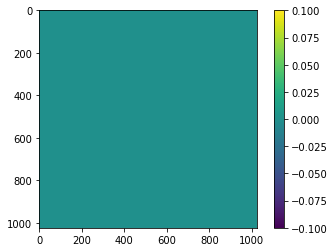

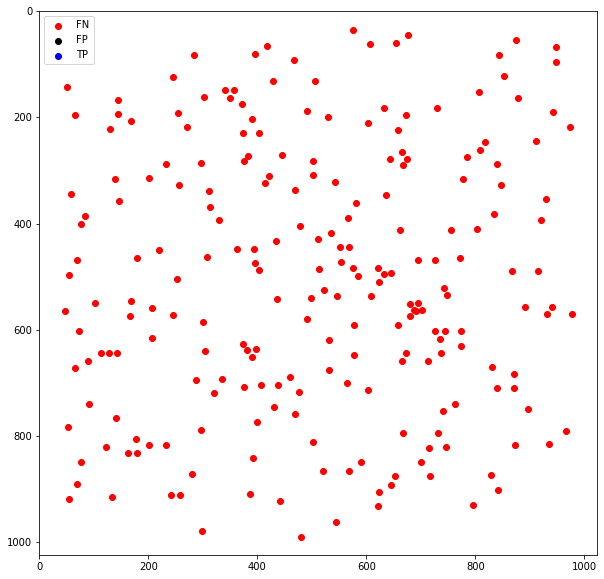

TP: 0
FP: 0
FN: 227
TN: 0

recall:    0.0
precision: -1
F1:        -1
bal_acc:   -1


In [13]:
data_dir = parent_dir + "data/WSe/test_experiment/211_day/RR_1922/"
evaluate_image(data_dir)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


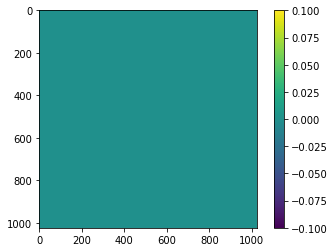

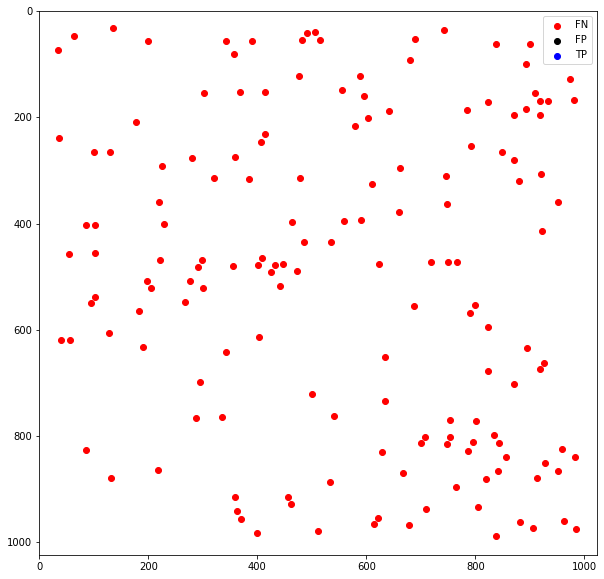

TP: 0
FP: 0
FN: 159
TN: 0

recall:    0.0
precision: -1
F1:        -1
bal_acc:   -1


In [14]:
data_dir = parent_dir + "data/WSe/test_experiment/211_day/RR_2124/"
evaluate_image(data_dir)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


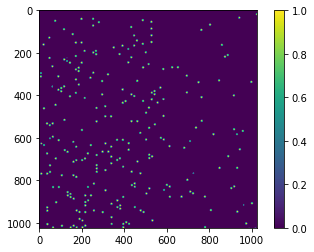

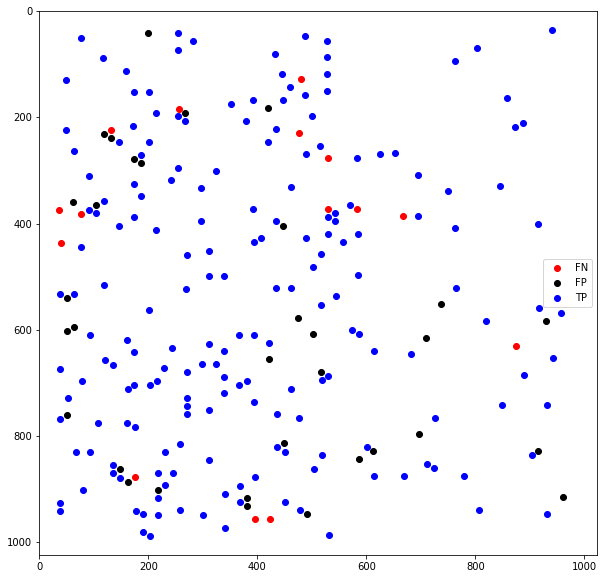

TP: 191
FP: 33
FN: 15
TN: 0

recall:    0.9271844660194175
precision: 0.8526785714285714
F1:        0.8883720930232558
bal_acc:   0.46359223300970875


In [10]:
data_dir = parent_dir + "data/WSe/test_experiment/107_day/RR_1750/"
evaluate_image(data_dir)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


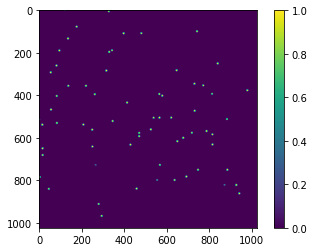

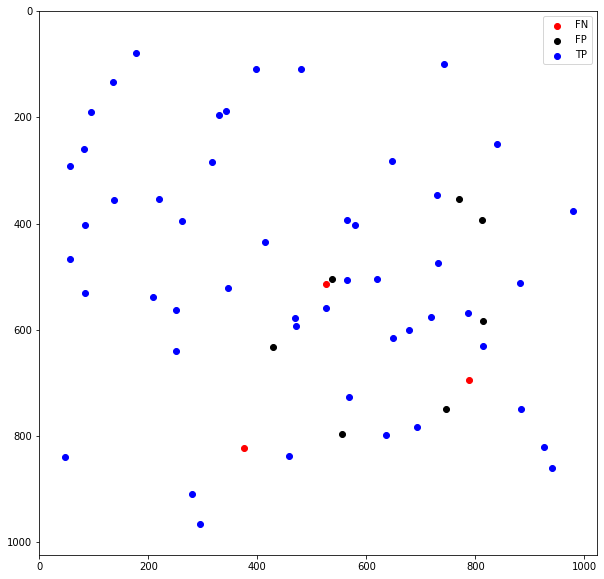

TP: 50
FP: 7
FN: 3
TN: 0

recall:    0.9433962264150944
precision: 0.8771929824561403
F1:        0.9090909090909091
bal_acc:   0.4716981132075472


In [11]:
data_dir = parent_dir + "data/WSe/test_experiment/107_day/RR_1840/"
evaluate_image(data_dir)

processing data
loading model
strides: (64, 64)
predicting data
stitching data


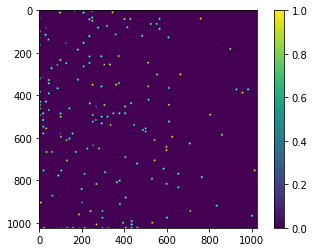

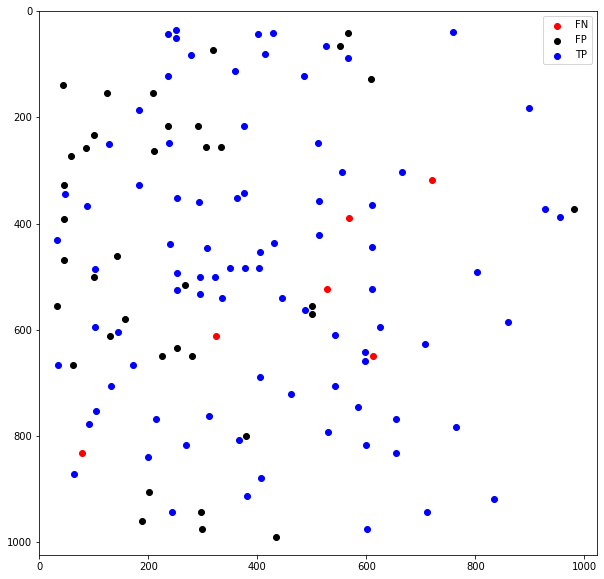

TP: 87
FP: 37
FN: 6
TN: 0

recall:    0.9354838709677419
precision: 0.7016129032258065
F1:        0.8018433179723502
bal_acc:   0.46774193548387094


In [12]:
data_dir = parent_dir + "data/WSe/test_experiment/107_day/RR_1847/"
evaluate_image(data_dir)